In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.2 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=e75781cb17e2520c50df37b5bbfc92c619fe87bff9d88a2ebdbe51ad1239a597
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence_transformers


In [3]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 23.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=7a832393af1deb63e6ee17e6c174e09f374b0b4cd7c6fdd167b1cc7d63ac4d6b
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
import torch
from langdetect import detect

In [5]:
os.chdir("/content/drive/My Drive/IRProject")

In [6]:
# Read the csv file
df = pd.read_csv('covid_df_10000.csv')
df

,Unnamed: 0,doc_id,title,abstract,text_body
0,1,5ac635d21fdb1726f21d7090a233dd2b5ffdc1b5,"Long Term Predictors of Breathlessness, Exerci...",J o u r n a l P r e -p r o o f 2,With over 246 million Coronavirus disease 2019...
1,2,71d93a6452061c57ae1532991d4a20cd6fc6fcb3,Emergence of universality in the transmission ...,The complexities involved in modelling the tra...,• Even though the pattern of disease spread is...
2,3,635ba7eca764f7caaa82904197c40a20111ec940,Supporting families to protect child health: P...,Supportive parenting is critical for promoting...,a1111111111 a1111111111 a1111111111 a111111111...
3,4,0282d2f9eb65318e40db21efbe6172ce16c8acf5,Perspectives on the Early Quality of Evidence ...,Background: The severe acute respiratory syndr...,The severe acute respiratory syndrome coronavi...
4,5,d96113a2d8691d3b1aee5fd1b5d30241f2b2a633,Quantify the role of superspreaders -opinion l...,Effective communication of accurate informatio...,We design a mathematical model to quantify the...
...,...,...,...,...,...
9995,9996,e6fe93e18fe7e74cc6d90086205e877c4245df35,Journal Pre-proof Targeted delivery of inhalab...,The coronavirus disease 2019 pandemic has led ...,Coronavirus disease 2019 (COVID-19) is highly ...
9996,9997,a6f37939b6a069def17ff724d2d49bbb41ce8f82,NaN,Governments around the globe have started to d...,"The novel coronavirus , first detected late 20..."
9997,9998,8126a598911ae325a6ebf1e1ca2fb9ae08cc73a2,NaN,NaN,as a means of preventing transmission (Chu et ...
9998,9999,cc3f4dc92499c431d05f71a9a4d0e74704f0a30b,Surveillance of acute SARS-CoV-2 infections in...,Background: Switzerland had one of the highest...,The role of schools in severe acute respirator...


In [7]:
# Drop rows with NaN values in the 'text_body' column
df = df.dropna(subset=['text_body', 'abstract'])
df

,Unnamed: 0,doc_id,title,abstract,text_body
0,1,5ac635d21fdb1726f21d7090a233dd2b5ffdc1b5,"Long Term Predictors of Breathlessness, Exerci...",J o u r n a l P r e -p r o o f 2,With over 246 million Coronavirus disease 2019...
1,2,71d93a6452061c57ae1532991d4a20cd6fc6fcb3,Emergence of universality in the transmission ...,The complexities involved in modelling the tra...,• Even though the pattern of disease spread is...
2,3,635ba7eca764f7caaa82904197c40a20111ec940,Supporting families to protect child health: P...,Supportive parenting is critical for promoting...,a1111111111 a1111111111 a1111111111 a111111111...
3,4,0282d2f9eb65318e40db21efbe6172ce16c8acf5,Perspectives on the Early Quality of Evidence ...,Background: The severe acute respiratory syndr...,The severe acute respiratory syndrome coronavi...
4,5,d96113a2d8691d3b1aee5fd1b5d30241f2b2a633,Quantify the role of superspreaders -opinion l...,Effective communication of accurate informatio...,We design a mathematical model to quantify the...
...,...,...,...,...,...
9993,9994,2755fa83e1650b83aed9552391340218211be5f6,NaN,"Citation: Singab, A.N.B.; Mostafa, N.M.; Elkha...",Insects are vital organisms that have been sho...
9995,9996,e6fe93e18fe7e74cc6d90086205e877c4245df35,Journal Pre-proof Targeted delivery of inhalab...,The coronavirus disease 2019 pandemic has led ...,Coronavirus disease 2019 (COVID-19) is highly ...
9996,9997,a6f37939b6a069def17ff724d2d49bbb41ce8f82,NaN,Governments around the globe have started to d...,"The novel coronavirus , first detected late 20..."
9998,9999,cc3f4dc92499c431d05f71a9a4d0e74704f0a30b,Surveillance of acute SARS-CoV-2 infections in...,Background: Switzerland had one of the highest...,The role of schools in severe acute respirator...


In [8]:
# Function to detect the language of the text
def detect_language(text):
    try:
        return detect(text)
    except:
        return None

# Remove non-English rows
df['language'] = df['text_body'].apply(detect_language)
df = df[df['language'] == 'en']
df

<ipython-input-8-b063df0b0133>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language'] = df['text_body'].apply(detect_language)


,Unnamed: 0,doc_id,title,abstract,text_body,language
0,1,5ac635d21fdb1726f21d7090a233dd2b5ffdc1b5,"Long Term Predictors of Breathlessness, Exerci...",J o u r n a l P r e -p r o o f 2,With over 246 million Coronavirus disease 2019...,en
1,2,71d93a6452061c57ae1532991d4a20cd6fc6fcb3,Emergence of universality in the transmission ...,The complexities involved in modelling the tra...,• Even though the pattern of disease spread is...,en
2,3,635ba7eca764f7caaa82904197c40a20111ec940,Supporting families to protect child health: P...,Supportive parenting is critical for promoting...,a1111111111 a1111111111 a1111111111 a111111111...,en
3,4,0282d2f9eb65318e40db21efbe6172ce16c8acf5,Perspectives on the Early Quality of Evidence ...,Background: The severe acute respiratory syndr...,The severe acute respiratory syndrome coronavi...,en
4,5,d96113a2d8691d3b1aee5fd1b5d30241f2b2a633,Quantify the role of superspreaders -opinion l...,Effective communication of accurate informatio...,We design a mathematical model to quantify the...,en
...,...,...,...,...,...,...
9993,9994,2755fa83e1650b83aed9552391340218211be5f6,NaN,"Citation: Singab, A.N.B.; Mostafa, N.M.; Elkha...",Insects are vital organisms that have been sho...,en
9995,9996,e6fe93e18fe7e74cc6d90086205e877c4245df35,Journal Pre-proof Targeted delivery of inhalab...,The coronavirus disease 2019 pandemic has led ...,Coronavirus disease 2019 (COVID-19) is highly ...,en
9996,9997,a6f37939b6a069def17ff724d2d49bbb41ce8f82,NaN,Governments around the globe have started to d...,"The novel coronavirus , first detected late 20...",en
9998,9999,cc3f4dc92499c431d05f71a9a4d0e74704f0a30b,Surveillance of acute SARS-CoV-2 infections in...,Background: Switzerland had one of the highest...,The role of schools in severe acute respirator...,en


In [9]:
# Concatenate the title and abstract columns to form a new column called 'full_text'
df['title_body'] = df['title'].fillna('') + ' ' + df['text_body'].fillna('')
df

<ipython-input-9-f5da3c5ccf11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title_body'] = df['title'].fillna('') + ' ' + df['text_body'].fillna('')


,Unnamed: 0,doc_id,title,abstract,text_body,language,title_body
0,1,5ac635d21fdb1726f21d7090a233dd2b5ffdc1b5,"Long Term Predictors of Breathlessness, Exerci...",J o u r n a l P r e -p r o o f 2,With over 246 million Coronavirus disease 2019...,en,"Long Term Predictors of Breathlessness, Exerci..."
1,2,71d93a6452061c57ae1532991d4a20cd6fc6fcb3,Emergence of universality in the transmission ...,The complexities involved in modelling the tra...,• Even though the pattern of disease spread is...,en,Emergence of universality in the transmission ...
2,3,635ba7eca764f7caaa82904197c40a20111ec940,Supporting families to protect child health: P...,Supportive parenting is critical for promoting...,a1111111111 a1111111111 a1111111111 a111111111...,en,Supporting families to protect child health: P...
3,4,0282d2f9eb65318e40db21efbe6172ce16c8acf5,Perspectives on the Early Quality of Evidence ...,Background: The severe acute respiratory syndr...,The severe acute respiratory syndrome coronavi...,en,Perspectives on the Early Quality of Evidence ...
4,5,d96113a2d8691d3b1aee5fd1b5d30241f2b2a633,Quantify the role of superspreaders -opinion l...,Effective communication of accurate informatio...,We design a mathematical model to quantify the...,en,Quantify the role of superspreaders -opinion l...
...,...,...,...,...,...,...,...
9993,9994,2755fa83e1650b83aed9552391340218211be5f6,NaN,"Citation: Singab, A.N.B.; Mostafa, N.M.; Elkha...",Insects are vital organisms that have been sho...,en,Insects are vital organisms that have been sh...
9995,9996,e6fe93e18fe7e74cc6d90086205e877c4245df35,Journal Pre-proof Targeted delivery of inhalab...,The coronavirus disease 2019 pandemic has led ...,Coronavirus disease 2019 (COVID-19) is highly ...,en,Journal Pre-proof Targeted delivery of inhalab...
9996,9997,a6f37939b6a069def17ff724d2d49bbb41ce8f82,NaN,Governments around the globe have started to d...,"The novel coronavirus , first detected late 20...",en,"The novel coronavirus , first detected late 2..."
9998,9999,cc3f4dc92499c431d05f71a9a4d0e74704f0a30b,Surveillance of acute SARS-CoV-2 infections in...,Background: Switzerland had one of the highest...,The role of schools in severe acute respirator...,en,Surveillance of acute SARS-CoV-2 infections in...


In [10]:
# Load a pre-trained BERT model
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

# Generate sentence embeddings for each full text in the DataFrame
embeddings = model.encode(df['title_body'].tolist(), convert_to_tensor=True)

In [11]:
# Define a function for searching the DataFrame using a query string
def search(query, embeddings, top_n=10):
    # Encode the query string to generate a query embedding
    query_embedding = model.encode(query, convert_to_tensor=True)

    # Compute the cosine similarity between the query embedding and the embeddings of each full text
    cos_scores = torch.nn.functional.cosine_similarity(query_embedding, embeddings).cpu().numpy()

    # Get the indices of the top n scores in descending order
    top_indices = cos_scores.argsort()[-top_n:][::-1]

    # Return the DataFrame rows corresponding to the top n scores and the numpy array of the top n scores
    return df.iloc[top_indices]


**Query 1: 'transmission of virus in community'**

Please enter your query: transmission of virus in community

The scores array for the top ten results: [0.5301916  0.5026302  0.5010604  0.4876848  0.48037237 0.4755181
 0.4680222  0.46242398 0.46182632 0.45621127]

Top 10 results for the query 'transmission of virus in community':

Score: 0.5301916003227234
Title: Metabolites with SARS-CoV-2 Inhibitory Activity Identified from Human Microbiome Commensals
Body Text: that small molecules produced by human-associated bacteria can affect not only host cells but also coinhabiting organisms of the microbiome (5, 6) . While many studies have focused on identifying microbiota-encoded metabolites that affect either eukaryotic or prokaryotic cells, there are comparatively few examples of commensal metabolites that affect viral infection of host cells (7, 8) . Given that bacteria populate body sites that are frequently exposed to viruses, we sought to determine whether commensal bacteria encode metabolites that can inhibit SARS-CoV-2 infection.


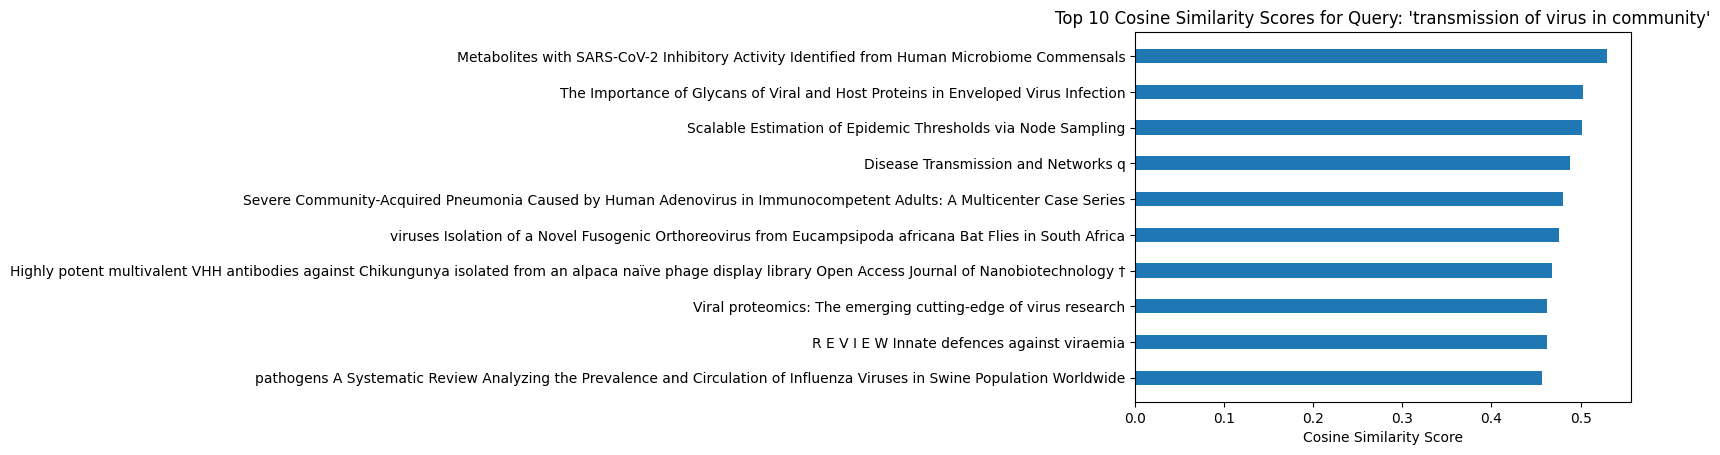

In [12]:
if __name__ == "__main__":
    # Prompt the user to enter a query string
    query = input("Please enter your query: ")
    
    # Set the number of top results to display
    top_n = 10
    
    # Call the search function to find the top results
    results = search(query, embeddings, top_n)

    # Sort the cosine similarity scores array in a descending order
    cos_scores = torch.nn.functional.cosine_similarity(model.encode(query, convert_to_tensor=True), embeddings).cpu().numpy()
    top_indices = cos_scores.argsort()[-top_n:][::-1]
    top_cos_scores =  cos_scores[top_indices]
    print(f"\nThe scores array for the top ten results: {top_cos_scores}")

    # Print the top results to the console
    print(f"\nTop {top_n} results for the query '{query}':")
    for (index, row), score in zip(results.iterrows(), top_cos_scores):
        print(f"\nScore: {score}")
        print(f"Title: {row['title']}\nBody Text: {row['text_body']}")

    # create Pandas dataframe from two lists
    df_scores = pd.DataFrame({"Titles":results['title'], "Scores":top_cos_scores})
    df_scores_sorted = df_scores.sort_values('Scores')
    df_scores_sorted = df_scores_sorted.astype({"Titles": str, "Scores": float})

    # Create a bar chart of the cosine similarity scores
    plt.barh("Titles", "Scores", data = df_scores_sorted, height = 0.4)
    plt.title(f"Top 10 Cosine Similarity Scores for Query: '{query}'")
    plt.xlabel("Cosine Similarity Score")
    plt.xticks() 
    plt.show()

**Query 2: 'range of incubation period'**

Please enter your query: range of incubation period

The scores array for the top ten results: [0.42164695 0.34374273 0.33534434 0.33029956 0.32687578 0.32436186
 0.32349953 0.31864846 0.31520867 0.31184244]

Top 10 results for the query 'range of incubation period':

Score: 0.42164695262908936
Title: nan
Body Text: Dormancy, such as hibernation in mammals [1, 2] , diapause of insects and zooplankton [3] , as well as the soil seed banks [4, 5] , is a widespread and efficient adaptive strategy for populations under environmental fluctuation. Various types of dormancy are also a common form of stress response in bacteria including sporulation of Gram-positive bacteria [6] [7] [8] . The evolutionary stability of dormancy has been investigated under varying environments [3, 9, 10] , as well as under the environment with minimal abiotic fluctuations [3] . However, the dormant form of an organism is much more costly compared with the active form in the course of evolution, due to its inabili

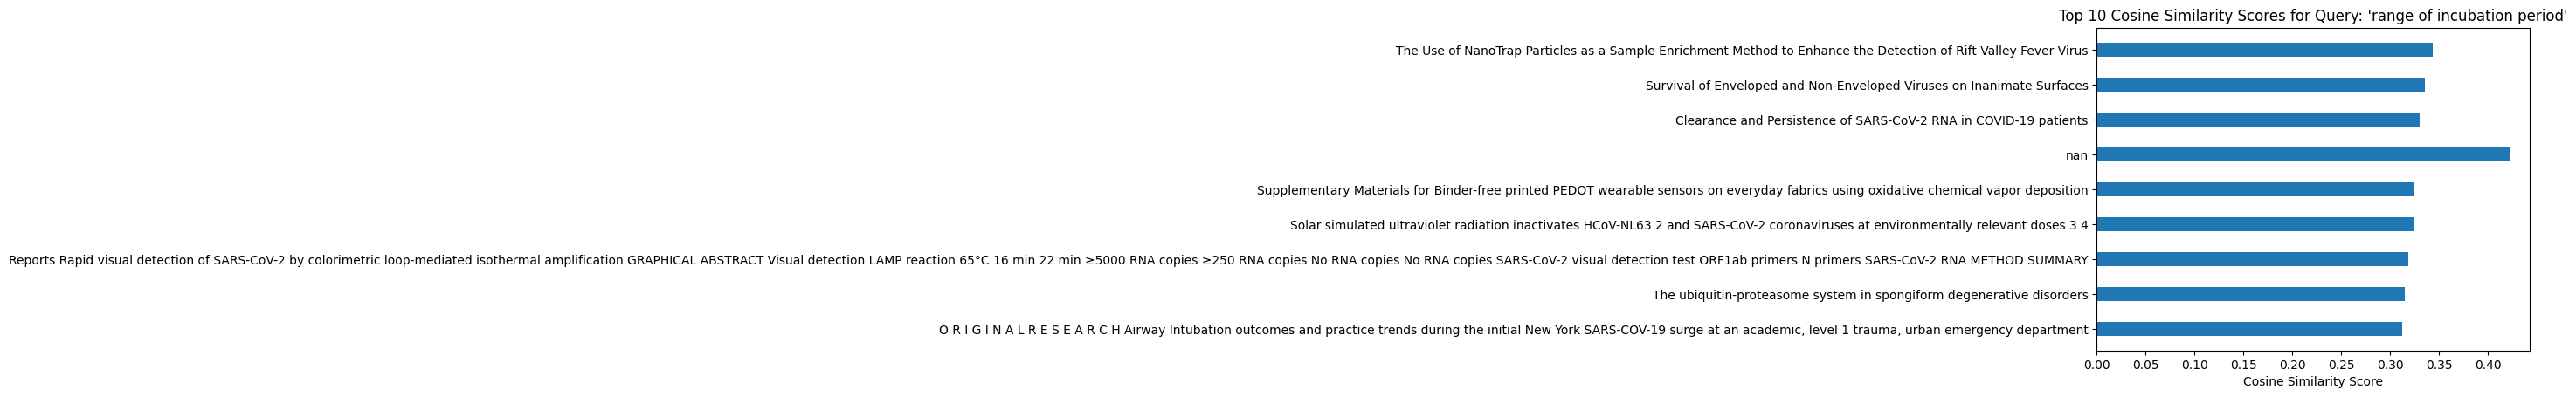

In [13]:
if __name__ == "__main__":
    # Prompt the user to enter a query string
    query = input("Please enter your query: ")
    
    # Set the number of top results to display
    top_n = 10
    
    # Call the search function to find the top results
    results = search(query, embeddings, top_n)

    # Sort the cosine similarity scores array in a descending order
    cos_scores = torch.nn.functional.cosine_similarity(model.encode(query, convert_to_tensor=True), embeddings).cpu().numpy()
    top_indices = cos_scores.argsort()[-top_n:][::-1]
    top_cos_scores =  cos_scores[top_indices]
    print(f"\nThe scores array for the top ten results: {top_cos_scores}")

    # Print the top results to the console
    print(f"\nTop {top_n} results for the query '{query}':")
    for (index, row), score in zip(results.iterrows(), top_cos_scores):
        print(f"\nScore: {score}")
        print(f"Title: {row['title']}\nBody Text: {row['text_body']}")

    # create Pandas dataframe from two lists
    df_scores = pd.DataFrame({"Titles":results['title'], "Scores":top_cos_scores})
    df_scores_sorted = df_scores.sort_values('Scores')
    df_scores_sorted = df_scores_sorted.astype({"Titles": str, "Scores": float})

    # Create a bar chart of the cosine similarity scores
    plt.barh("Titles", "Scores", data = df_scores_sorted, height = 0.4)
    plt.title(f"Top 10 Cosine Similarity Scores for Query: '{query}'")
    plt.xlabel("Cosine Similarity Score")
    plt.xticks() 
    plt.show()

**Query 3: 'seasonal outbreaks'**

Please enter your query: seasonal outbreaks

The scores array for the top ten results: [0.36079124 0.35284856 0.3486629  0.34791166 0.34472215 0.34288603
 0.3425369  0.34145716 0.33675793 0.33650655]

Top 10 results for the query 'seasonal outbreaks':

Score: 0.36079123616218567
Title: Regional disparity of covid-19 infections: an investigation using state-level Indian data
Body Text: The vicious Covid-19 virus has its spectre all over the world for over a year now. There is a wave of research about various aspects of this infections which include dynamics of disease spread, (SIR models), the effect of social distancing on infections, the economic effects of Covid lock down amongst others. 1 However, scarce efforts are devoted to understand the regional disparity in infections and what particularly drives the cluster of infections in a country. In this paper, we explore this issue using India as a testbed.
 India is chosen as our case study particularly because of its wide regional div

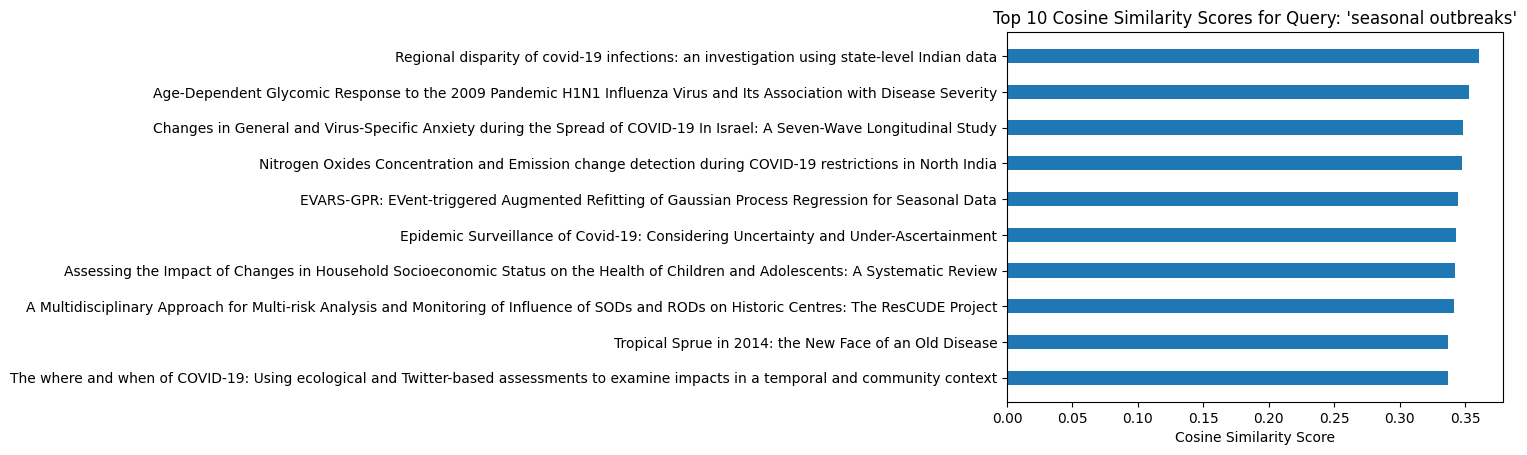

In [14]:
if __name__ == "__main__":
    # Prompt the user to enter a query string
    query = input("Please enter your query: ")
    
    # Set the number of top results to display
    top_n = 10
    
    # Call the search function to find the top results
    results = search(query, embeddings, top_n)

    # Sort the cosine similarity scores array in a descending order
    cos_scores = torch.nn.functional.cosine_similarity(model.encode(query, convert_to_tensor=True), embeddings).cpu().numpy()
    top_indices = cos_scores.argsort()[-top_n:][::-1]
    top_cos_scores =  cos_scores[top_indices]
    print(f"\nThe scores array for the top ten results: {top_cos_scores}")

    # Print the top results to the console
    print(f"\nTop {top_n} results for the query '{query}':")
    for (index, row), score in zip(results.iterrows(), top_cos_scores):
        print(f"\nScore: {score}")
        print(f"Title: {row['title']}\nBody Text: {row['text_body']}")

    # create Pandas dataframe from two lists
    df_scores = pd.DataFrame({"Titles":results['title'], "Scores":top_cos_scores})
    df_scores_sorted = df_scores.sort_values('Scores')
    df_scores_sorted = df_scores_sorted.astype({"Titles": str, "Scores": float})

    # Create a bar chart of the cosine similarity scores
    plt.barh("Titles", "Scores", data = df_scores_sorted, height = 0.4)
    plt.title(f"Top 10 Cosine Similarity Scores for Query: '{query}'")
    plt.xlabel("Cosine Similarity Score")
    plt.xticks() 
    plt.show()

**Query 4: 'effect of environment factors on virus'**

Please enter your query: effect of environment factors on virus

The scores array for the top ten results: [0.5586703  0.5410301  0.5358087  0.53011537 0.5193752  0.5037253
 0.5025569  0.49836713 0.49645478 0.49127862]

Top 10 results for the query 'effect of environment factors on virus':

Score: 0.5586702823638916
Title: Assessing the genetic component of the susceptibility of mice to viral infections
Body Text: The severity and outcome of viral infections may be influenced by a number of factors. Some of these factors, for example the age of the host, its physiological status or previous infections with similar infectious agents, are environmental by nature. Other factors, by contrast, depend on the genetic constitution of both the host and the infectious agent, and it is for this reason that the encounters between the two organisms have sometimes been compared with the 'battle' of two genomes. 1 Indeed, co-evolution of viruses with their hosts towards less deleterious infections mu

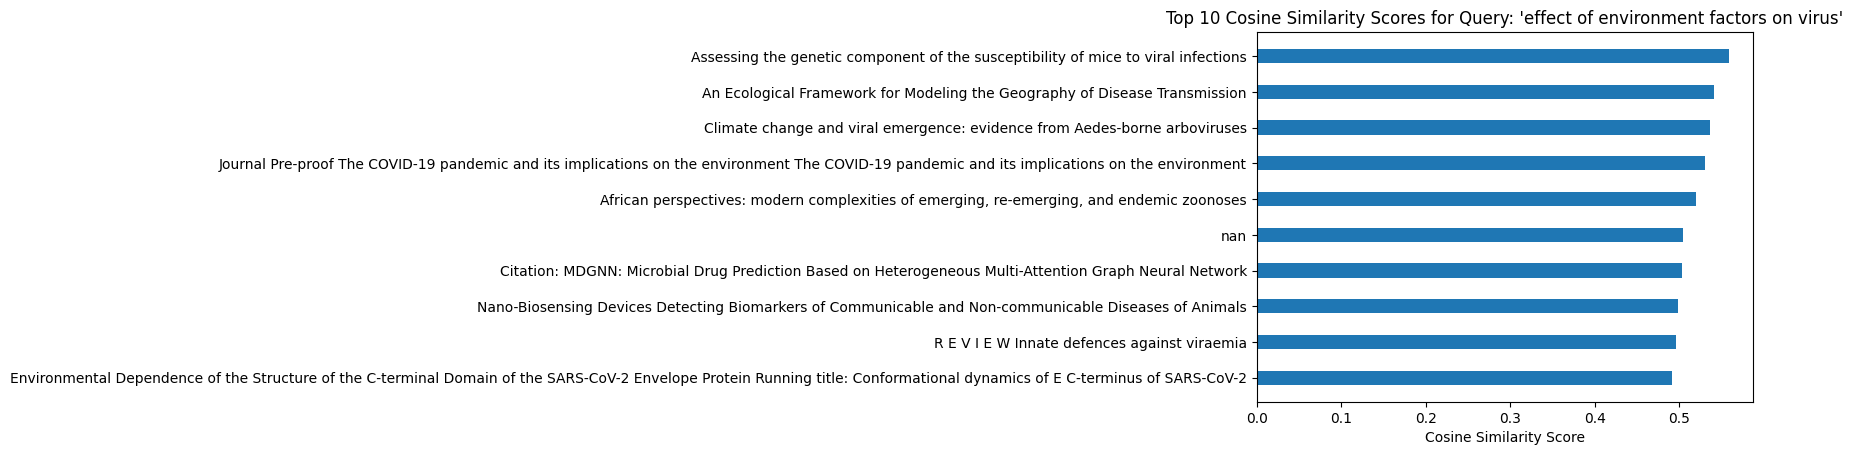

In [15]:
if __name__ == "__main__":
    # Prompt the user to enter a query string
    query = input("Please enter your query: ")
    
    # Set the number of top results to display
    top_n = 10
    
    # Call the search function to find the top results
    results = search(query, embeddings, top_n)

    # Sort the cosine similarity scores array in a descending order
    cos_scores = torch.nn.functional.cosine_similarity(model.encode(query, convert_to_tensor=True), embeddings).cpu().numpy()
    top_indices = cos_scores.argsort()[-top_n:][::-1]
    top_cos_scores =  cos_scores[top_indices]
    print(f"\nThe scores array for the top ten results: {top_cos_scores}")

    # Print the top results to the console
    print(f"\nTop {top_n} results for the query '{query}':")
    for (index, row), score in zip(results.iterrows(), top_cos_scores):
        print(f"\nScore: {score}")
        print(f"Title: {row['title']}\nBody Text: {row['text_body']}")

    # create Pandas dataframe from two lists
    df_scores = pd.DataFrame({"Titles":results['title'], "Scores":top_cos_scores})
    df_scores_sorted = df_scores.sort_values('Scores')
    df_scores_sorted = df_scores_sorted.astype({"Titles": str, "Scores": float})

    # Create a bar chart of the cosine similarity scores
    plt.barh("Titles", "Scores", data = df_scores_sorted, height = 0.4)
    plt.title(f"Top 10 Cosine Similarity Scores for Query: '{query}'")
    plt.xlabel("Cosine Similarity Score")
    plt.xticks() 
    plt.show()

**Query 5: 'persistence of virus on different inanimate surfaces'**

Please enter your query: persistence of virus on different inanimate surfaces

The scores array for the top ten results: [0.561203   0.56037664 0.5448694  0.5291928  0.52711123 0.52698046
 0.52358484 0.51473874 0.5061892  0.49635738]

Top 10 results for the query 'persistence of virus on different inanimate surfaces':

Score: 0.5612030029296875
Title: The Importance of Glycans of Viral and Host Proteins in Enveloped Virus Infection
Body Text: Animal viruses are parasites of animal cells that have characteristics such as heredity and replication, and are mainly composed of DNA or RNA, proteins and in some, a lipid membrane with glycoproteins (1) . Commonly, viruses achieve invasion and infection with the help of the synthetic machinery of host cells. Viruses can be divided into two groups depending on whether they have a lipid bilayer membrane on their outer surface or not: enveloped viruses and nonenveloped viruses. Enveloped viruses have a lipid bilayer that comes from the host cell. 

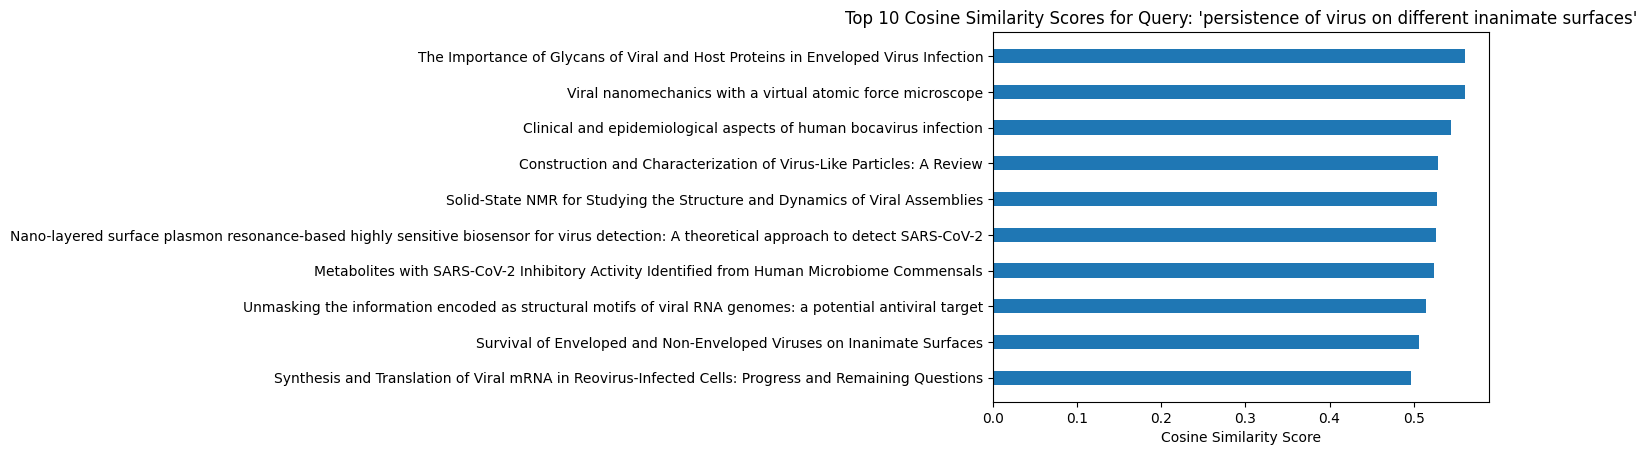

In [16]:
if __name__ == "__main__":
    # Prompt the user to enter a query string
    query = input("Please enter your query: ")
    
    # Set the number of top results to display
    top_n = 10
    
    # Call the search function to find the top results
    results = search(query, embeddings, top_n)

    # Sort the cosine similarity scores array in a descending order
    cos_scores = torch.nn.functional.cosine_similarity(model.encode(query, convert_to_tensor=True), embeddings).cpu().numpy()
    top_indices = cos_scores.argsort()[-top_n:][::-1]
    top_cos_scores =  cos_scores[top_indices]
    print(f"\nThe scores array for the top ten results: {top_cos_scores}")

    # Print the top results to the console
    print(f"\nTop {top_n} results for the query '{query}':")
    for (index, row), score in zip(results.iterrows(), top_cos_scores):
        print(f"\nScore: {score}")
        print(f"Title: {row['title']}\nBody Text: {row['text_body']}")

    # create Pandas dataframe from two lists
    df_scores = pd.DataFrame({"Titles":results['title'], "Scores":top_cos_scores})
    df_scores_sorted = df_scores.sort_values('Scores')
    df_scores_sorted = df_scores_sorted.astype({"Titles": str, "Scores": float})

    # Create a bar chart of the cosine similarity scores
    plt.barh("Titles", "Scores", data = df_scores_sorted, height = 0.4)
    plt.title(f"Top 10 Cosine Similarity Scores for Query: '{query}'")
    plt.xlabel("Cosine Similarity Score")
    plt.xticks() 
    plt.show()

# Let us repeat the same steps for the 'abstract' column instead of the 'text_body, i.e. search through the documents' abstracts and not body texts. We then will observe which embeddings yield higher similarity scores for the queries.

In [17]:
# Concatenate the title and abstract columns to form a new column called 'full_text'
df['title_abstract'] = df['title'].fillna('') + ' ' + df['abstract'].fillna('')
df

<ipython-input-17-01c1b3e8a2a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title_abstract'] = df['title'].fillna('') + ' ' + df['abstract'].fillna('')


,Unnamed: 0,doc_id,title,abstract,text_body,language,title_body,title_abstract
0,1,5ac635d21fdb1726f21d7090a233dd2b5ffdc1b5,"Long Term Predictors of Breathlessness, Exerci...",J o u r n a l P r e -p r o o f 2,With over 246 million Coronavirus disease 2019...,en,"Long Term Predictors of Breathlessness, Exerci...","Long Term Predictors of Breathlessness, Exerci..."
1,2,71d93a6452061c57ae1532991d4a20cd6fc6fcb3,Emergence of universality in the transmission ...,The complexities involved in modelling the tra...,• Even though the pattern of disease spread is...,en,Emergence of universality in the transmission ...,Emergence of universality in the transmission ...
2,3,635ba7eca764f7caaa82904197c40a20111ec940,Supporting families to protect child health: P...,Supportive parenting is critical for promoting...,a1111111111 a1111111111 a1111111111 a111111111...,en,Supporting families to protect child health: P...,Supporting families to protect child health: P...
3,4,0282d2f9eb65318e40db21efbe6172ce16c8acf5,Perspectives on the Early Quality of Evidence ...,Background: The severe acute respiratory syndr...,The severe acute respiratory syndrome coronavi...,en,Perspectives on the Early Quality of Evidence ...,Perspectives on the Early Quality of Evidence ...
4,5,d96113a2d8691d3b1aee5fd1b5d30241f2b2a633,Quantify the role of superspreaders -opinion l...,Effective communication of accurate informatio...,We design a mathematical model to quantify the...,en,Quantify the role of superspreaders -opinion l...,Quantify the role of superspreaders -opinion l...
...,...,...,...,...,...,...,...,...
9993,9994,2755fa83e1650b83aed9552391340218211be5f6,NaN,"Citation: Singab, A.N.B.; Mostafa, N.M.; Elkha...",Insects are vital organisms that have been sho...,en,Insects are vital organisms that have been sh...,"Citation: Singab, A.N.B.; Mostafa, N.M.; Elkh..."
9995,9996,e6fe93e18fe7e74cc6d90086205e877c4245df35,Journal Pre-proof Targeted delivery of inhalab...,The coronavirus disease 2019 pandemic has led ...,Coronavirus disease 2019 (COVID-19) is highly ...,en,Journal Pre-proof Targeted delivery of inhalab...,Journal Pre-proof Targeted delivery of inhalab...
9996,9997,a6f37939b6a069def17ff724d2d49bbb41ce8f82,NaN,Governments around the globe have started to d...,"The novel coronavirus , first detected late 20...",en,"The novel coronavirus , first detected late 2...",Governments around the globe have started to ...
9998,9999,cc3f4dc92499c431d05f71a9a4d0e74704f0a30b,Surveillance of acute SARS-CoV-2 infections in...,Background: Switzerland had one of the highest...,The role of schools in severe acute respirator...,en,Surveillance of acute SARS-CoV-2 infections in...,Surveillance of acute SARS-CoV-2 infections in...


In [18]:
# Generate sentence embeddings for each full text in the DataFrame
embeddings = model.encode(df['title_abstract'].tolist(), convert_to_tensor=True)

**Query 1: 'transmission of virus in community'**

Please enter your query: transmission of virus in community

The scores array for the top ten results: [0.5139553  0.4998778  0.49453396 0.4847337  0.4834643  0.4725433
 0.4704358  0.47015122 0.45390403 0.45339432]

Top 10 results for the query 'transmission of virus in community':

Score: 0.513955295085907
Title: Clinical and epidemiological aspects of human bocavirus infection
Abstract: Human bocavirus was recently described as a novel member of the Parvoviridae to infect humans. Based on accumulating clinical and epidemiological data the virus is currently being associated with respiratory infections in young children and infants and is furthermore discussed as causative agent of gastrointestinal illness.

Score: 0.49987781047821045
Title: Use of Systemic Therapies for Treatment of Psoriasis in People Living with Controlled HIV: Inference-Based Guidance from a Multidisciplinary Expert Panel
Abstract: Background: People living with human immunodeficiency virus (PLHIV) have a similar 

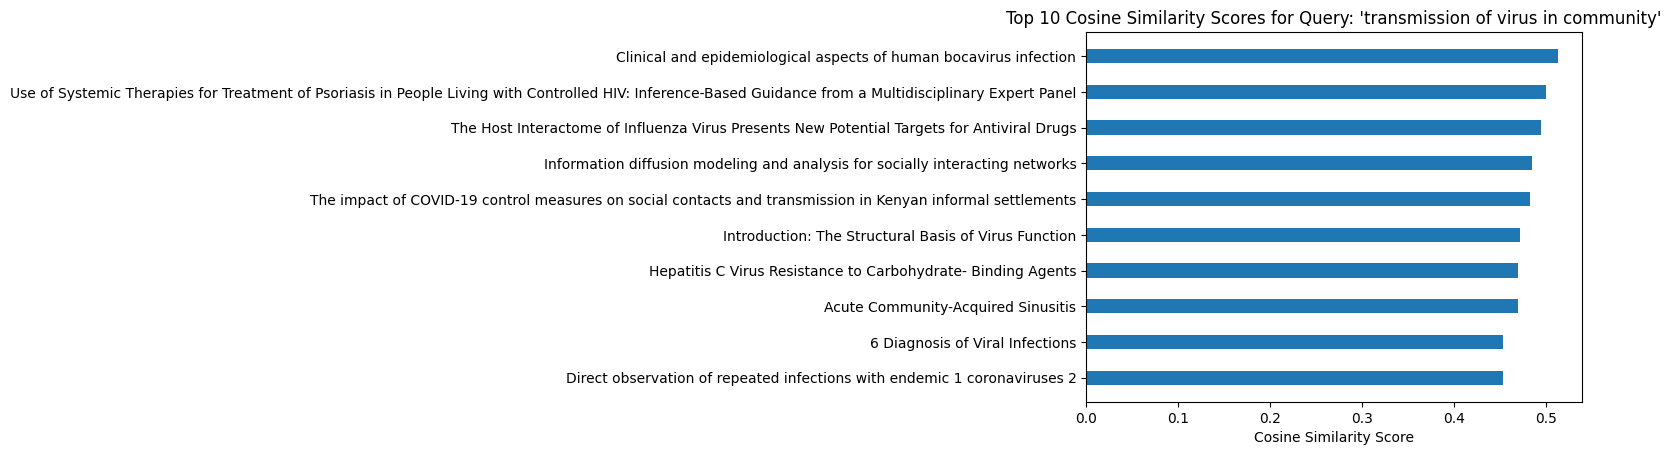

In [19]:
if __name__ == "__main__":
    # Prompt the user to enter a query string
    query = input("Please enter your query: ")
    
    # Set the number of top results to display
    top_n = 10
    
    # Call the search function to find the top results
    results = search(query, embeddings, top_n)

    # Sort the cosine similarity scores array in a descending order
    cos_scores = torch.nn.functional.cosine_similarity(model.encode(query, convert_to_tensor=True), embeddings).cpu().numpy()
    top_indices = cos_scores.argsort()[-top_n:][::-1]
    top_cos_scores =  cos_scores[top_indices]
    print(f"\nThe scores array for the top ten results: {top_cos_scores}")

    # Print the top results to the console
    print(f"\nTop {top_n} results for the query '{query}':")
    for (index, row), score in zip(results.iterrows(), top_cos_scores):
        print(f"\nScore: {score}")
        print(f"Title: {row['title']}\nAbstract: {row['abstract']}")

    # create Pandas dataframe from two lists
    df_scores = pd.DataFrame({"Titles":results['title'], "Scores":top_cos_scores})
    df_scores_sorted = df_scores.sort_values('Scores')
    df_scores_sorted = df_scores_sorted.astype({"Titles": str, "Scores": float})

    # Create a bar chart of the cosine similarity scores
    plt.barh("Titles", "Scores", data = df_scores_sorted, height = 0.4)
    plt.title(f"Top 10 Cosine Similarity Scores for Query: '{query}'")
    plt.xlabel("Cosine Similarity Score")
    plt.xticks() 
    plt.show()

**Query 2: 'range of incubation period'**

Please enter your query: range of incubation period

The scores array for the top ten results: [0.3547374  0.3540697  0.34451744 0.33828855 0.33509752 0.33366048
 0.32589957 0.31894672 0.31646284 0.300242  ]

Top 10 results for the query 'range of incubation period':

Score: 0.35473740100860596
Title: C L I N I C A L I M A G E Air, Air Everywhere!
Abstract: When using a gum elastic bougie, a common device to aid difficult intubations, one must appreciate the significant consequences, be prepared to manage emergency complications, and use safely by advancing under direct vision and using the markings to guide insertion.
 anesthesia, emergency medicine, intensive care medicine, pneumomediastinum, pneumothorax
 This chest X-ray shows a large right-sided pneumothorax with a degree of mediastinal shift suggesting tensioning (The chest X-ray you should never see!). Furthermore, features of a pneumomediastinum are present including the continuous diaphragm sign, air around the aortic arch, an

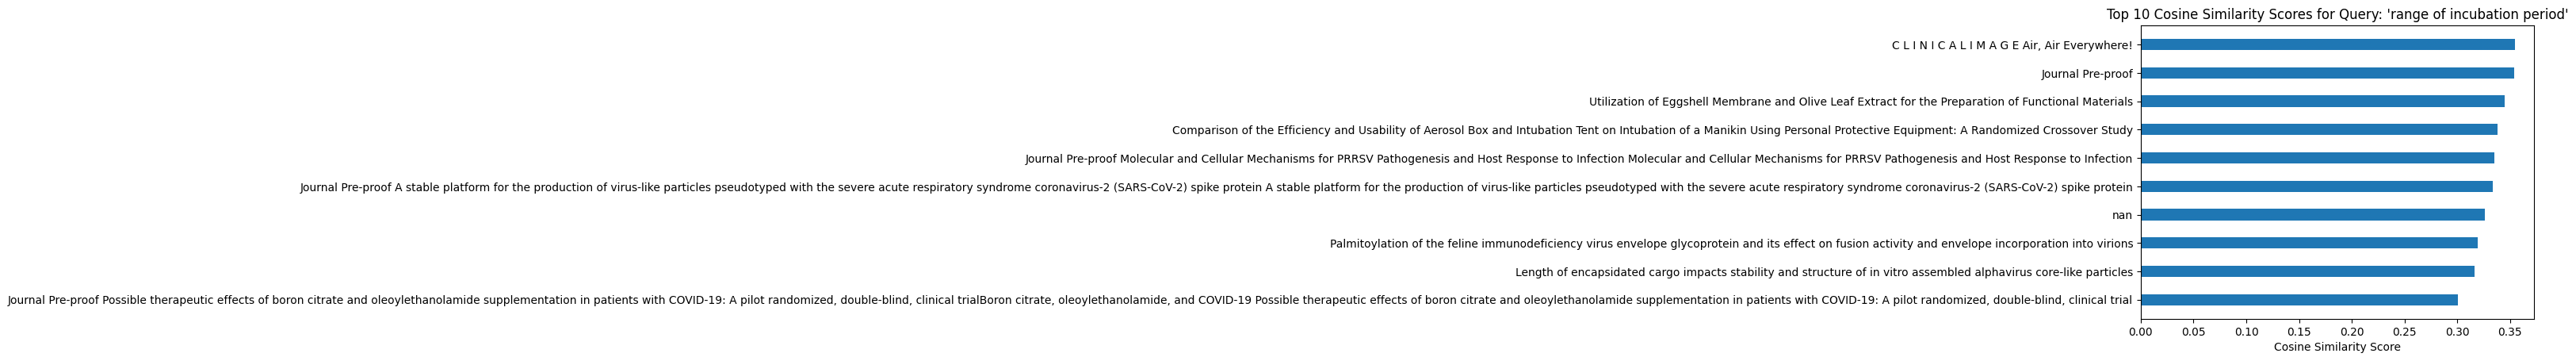

In [20]:
if __name__ == "__main__":
    # Prompt the user to enter a query string
    query = input("Please enter your query: ")
    
    # Set the number of top results to display
    top_n = 10
    
    # Call the search function to find the top results
    results = search(query, embeddings, top_n)

    # Sort the cosine similarity scores array in a descending order
    cos_scores = torch.nn.functional.cosine_similarity(model.encode(query, convert_to_tensor=True), embeddings).cpu().numpy()
    top_indices = cos_scores.argsort()[-top_n:][::-1]
    top_cos_scores =  cos_scores[top_indices]
    print(f"\nThe scores array for the top ten results: {top_cos_scores}")

    # Print the top results to the console
    print(f"\nTop {top_n} results for the query '{query}':")
    for (index, row), score in zip(results.iterrows(), top_cos_scores):
        print(f"\nScore: {score}")
        print(f"Title: {row['title']}\nAbstract: {row['abstract']}")

    # create Pandas dataframe from two lists
    df_scores = pd.DataFrame({"Titles":results['title'], "Scores":top_cos_scores})
    df_scores_sorted = df_scores.sort_values('Scores')
    df_scores_sorted = df_scores_sorted.astype({"Titles": str, "Scores": float})

    # Create a bar chart of the cosine similarity scores
    plt.barh("Titles", "Scores", data = df_scores_sorted, height = 0.4)
    plt.title(f"Top 10 Cosine Similarity Scores for Query: '{query}'")
    plt.xlabel("Cosine Similarity Score")
    plt.xticks() 
    plt.show()

**Query 3: 'seasonal outbreaks'**

Please enter your query: seasonal outbreaks

The scores array for the top ten results: [0.36814556 0.34515458 0.3425411  0.33931565 0.3392701  0.3356938
 0.33553135 0.33301526 0.3235291  0.32335636]

Top 10 results for the query 'seasonal outbreaks':

Score: 0.36814555525779724
Title: Impact of COVID-19 epidemic curtailment strategies in selected Indian states: An analysis by reproduction number and doubling time with incidence modelling Arun Mitra ID
Abstract: The Government of India in-network with the state governments has implemented the epidemic curtailment strategies inclusive of case-isolation, quarantine and lockdown in response to ongoing novel coronavirus (COVID-19) outbreak. In this manuscript, we attempt to estimate the impact of these steps across ten selected Indian states using crowdsourced data. The trajectory of the outbreak was parameterized by the reproduction number (R 0 ), doubling time, and growth rate. These parameters were estimated at two time-periods after the

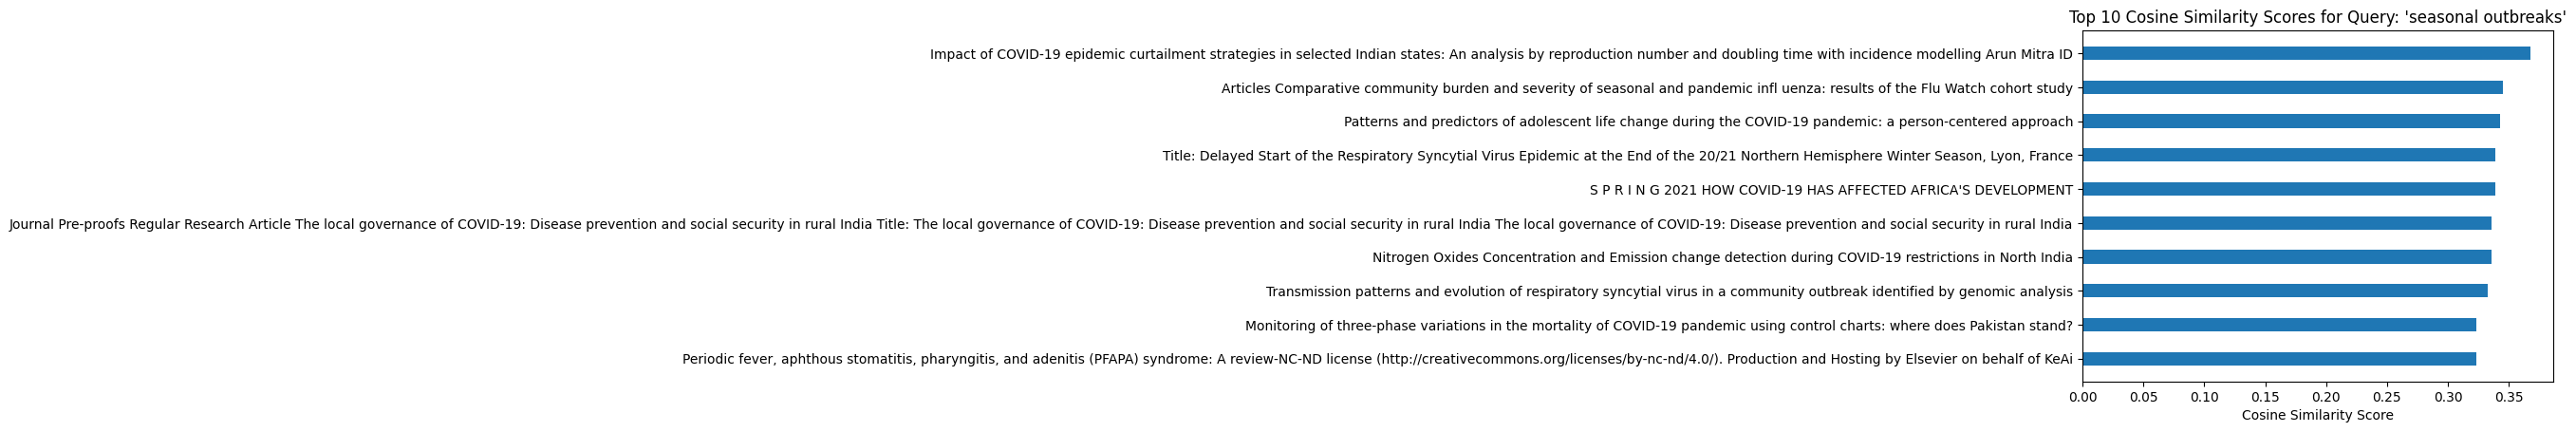

In [21]:
if __name__ == "__main__":
    # Prompt the user to enter a query string
    query = input("Please enter your query: ")
    
    # Set the number of top results to display
    top_n = 10
    
    # Call the search function to find the top results
    results = search(query, embeddings, top_n)

    # Sort the cosine similarity scores array in a descending order
    cos_scores = torch.nn.functional.cosine_similarity(model.encode(query, convert_to_tensor=True), embeddings).cpu().numpy()
    top_indices = cos_scores.argsort()[-top_n:][::-1]
    top_cos_scores =  cos_scores[top_indices]
    print(f"\nThe scores array for the top ten results: {top_cos_scores}")

    # Print the top results to the console
    print(f"\nTop {top_n} results for the query '{query}':")
    for (index, row), score in zip(results.iterrows(), top_cos_scores):
        print(f"\nScore: {score}")
        print(f"Title: {row['title']}\nAbstract: {row['abstract']}")

    # create Pandas dataframe from two lists
    df_scores = pd.DataFrame({"Titles":results['title'], "Scores":top_cos_scores})
    df_scores_sorted = df_scores.sort_values('Scores')
    df_scores_sorted = df_scores_sorted.astype({"Titles": str, "Scores": float})

    # Create a bar chart of the cosine similarity scores
    plt.barh("Titles", "Scores", data = df_scores_sorted, height = 0.4)
    plt.title(f"Top 10 Cosine Similarity Scores for Query: '{query}'")
    plt.xlabel("Cosine Similarity Score")
    plt.xticks() 
    plt.show()

**Query 4: 'effect of environment factors on virus'**

Please enter your query: effect of environment factors on virus

The scores array for the top ten results: [0.5622715  0.5306941  0.5242647  0.52382934 0.5236742  0.52141833
 0.51727295 0.5142398  0.5117291  0.5088506 ]

Top 10 results for the query 'effect of environment factors on virus':

Score: 0.5622714757919312
Title: Climate change and viral emergence: evidence from Aedes-borne arboviruses
Abstract: Climate change is leading to increases in global temperatures and erratic precipitation patterns, both of which are contributing to the expansion of mosquito-borne arboviruses and the populations of the mosquitos that vector them. Herein, we review recent evidence of emergence and expansion of arboviruses transmitted by Aedes mosquitos that has been driven in part by environmental changes. We present as a case study of recent work from Có rdoba, Argentina, where dengue has been actively emerging in the past decade. We review recent empirical and modeling studies that aim to understan

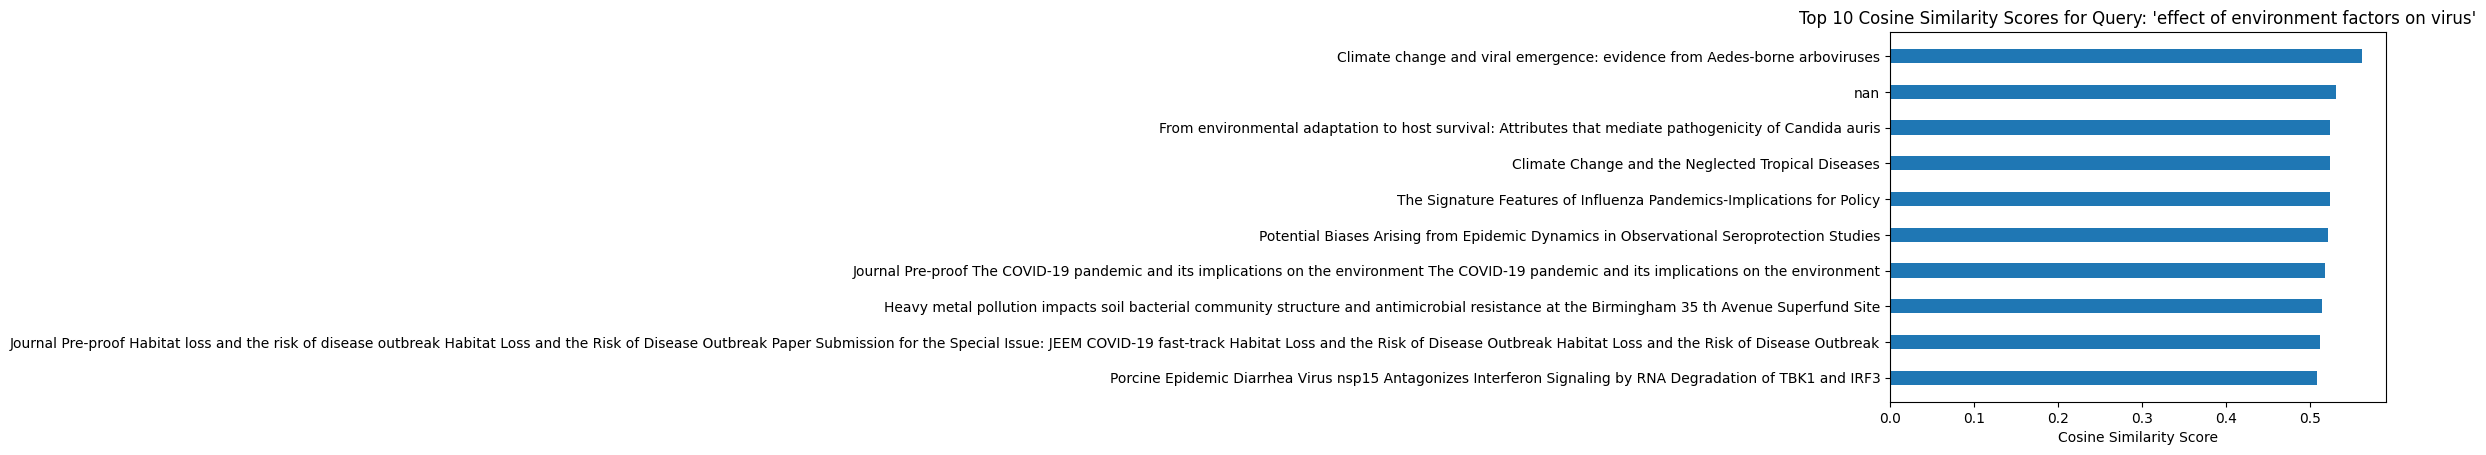

In [22]:
if __name__ == "__main__":
    # Prompt the user to enter a query string
    query = input("Please enter your query: ")
    
    # Set the number of top results to display
    top_n = 10
    
    # Call the search function to find the top results
    results = search(query, embeddings, top_n)

    # Sort the cosine similarity scores array in a descending order
    cos_scores = torch.nn.functional.cosine_similarity(model.encode(query, convert_to_tensor=True), embeddings).cpu().numpy()
    top_indices = cos_scores.argsort()[-top_n:][::-1]
    top_cos_scores =  cos_scores[top_indices]
    print(f"\nThe scores array for the top ten results: {top_cos_scores}")

    # Print the top results to the console
    print(f"\nTop {top_n} results for the query '{query}':")
    for (index, row), score in zip(results.iterrows(), top_cos_scores):
        print(f"\nScore: {score}")
        print(f"Title: {row['title']}\nAbstract: {row['abstract']}")

    # create Pandas dataframe from two lists
    df_scores = pd.DataFrame({"Titles":results['title'], "Scores":top_cos_scores})
    df_scores_sorted = df_scores.sort_values('Scores')
    df_scores_sorted = df_scores_sorted.astype({"Titles": str, "Scores": float})

    # Create a bar chart of the cosine similarity scores
    plt.barh("Titles", "Scores", data = df_scores_sorted, height = 0.4)
    plt.title(f"Top 10 Cosine Similarity Scores for Query: '{query}'")
    plt.xlabel("Cosine Similarity Score")
    plt.xticks() 
    plt.show()

**Query 5: 'persistence of virus on different inanimate surfaces'**

Please enter your query: persistence of virus on different inanimate surfaces

The scores array for the top ten results: [0.59498155 0.55695534 0.5463405  0.5376633  0.53340065 0.52693045
 0.513257   0.51076627 0.5091138  0.5018086 ]

Top 10 results for the query 'persistence of virus on different inanimate surfaces':

Score: 0.5949815511703491
Title: Journal Pre-proof Surface Chemistry Can Unlock Drivers of Surface Stability of SARS-CoV-2 in Variety of Environmental Conditions Surface Chemistry Can Unlock Drivers of Surface Stability of SARS-CoV-2 in Variety of Environmental Conditions
Abstract: The surface stability and resulting transmission of the SARS-CoV-2, specifically in indoor environments, have been identified as a potential pandemic challenge requiring investigation. This novel virus can be found on various surfaces in contaminated sites such as clinical places, however, the behaviour and molecular interactions of the virus with respect to the surfaces are poorly understood.

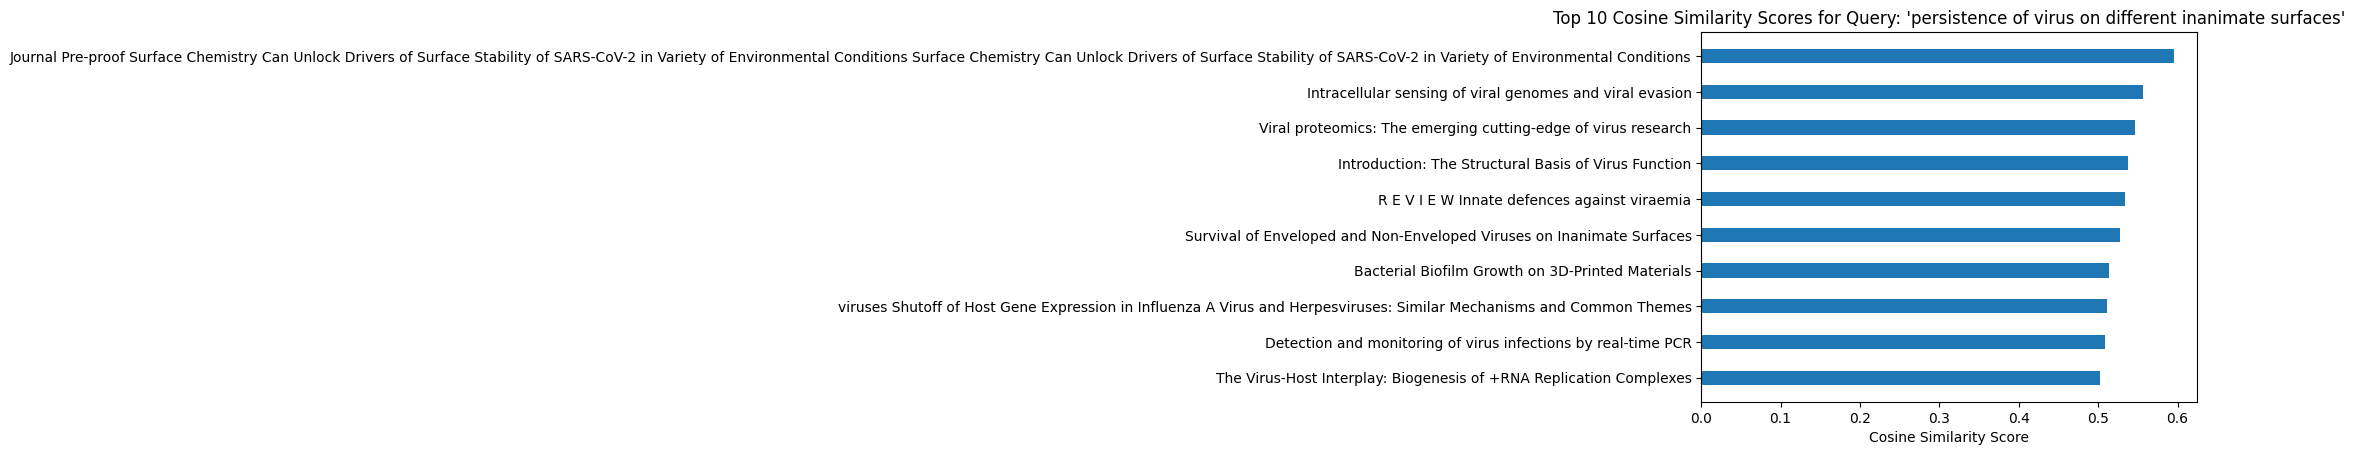

In [23]:
if __name__ == "__main__":
    # Prompt the user to enter a query string
    query = input("Please enter your query: ")
    
    # Set the number of top results to display
    top_n = 10
    
    # Call the search function to find the top results
    results = search(query, embeddings, top_n)

    # Sort the cosine similarity scores array in a descending order
    cos_scores = torch.nn.functional.cosine_similarity(model.encode(query, convert_to_tensor=True), embeddings).cpu().numpy()
    top_indices = cos_scores.argsort()[-top_n:][::-1]
    top_cos_scores =  cos_scores[top_indices]
    print(f"\nThe scores array for the top ten results: {top_cos_scores}")

    # Print the top results to the console
    print(f"\nTop {top_n} results for the query '{query}':")
    for (index, row), score in zip(results.iterrows(), top_cos_scores):
        print(f"\nScore: {score}")
        print(f"Title: {row['title']}\nAbstract: {row['abstract']}")

    # create Pandas dataframe from two lists
    df_scores = pd.DataFrame({"Titles":results['title'], "Scores":top_cos_scores})
    df_scores_sorted = df_scores.sort_values('Scores')
    df_scores_sorted = df_scores_sorted.astype({"Titles": str, "Scores": float})

    # Create a bar chart of the cosine similarity scores
    plt.barh("Titles", "Scores", data = df_scores_sorted, height = 0.4)
    plt.title(f"Top 10 Cosine Similarity Scores for Query: '{query}'")
    plt.xlabel("Cosine Similarity Score")
    plt.xticks() 
    plt.show()